In [2]:
from manim import *

config.verbosity = "WARNING"

Manim Community v0.16.0.post0

In [ ]:
%%manim --quality=m CountAllIntegers

import numpy as np
import math

class CountAllIntegers(Scene):
    def construct(self):
        """
        Draws a number line from -5 to 5
        The animates "counting" the number line by showing
        a new number above the number line. Starting with 0 over 0,
        1 over 1, then 2 over -1, then 3 over 2, 4 over -2 and so on.
        """
        self.camera.background_color = "#d6e8e1"
        number_line = NumberLine(x_range=[-3, 3, 1], length=10, include_numbers=True, color=BLACK, font_size=46, stroke_width=4)
        for number in number_line.numbers:
            number.set_color(BLACK)
        self.play(Create(number_line))
        # self.play(FadeIn(number_line), run_time=0.5)
        self.wait(0.5)


        positions = [0]
        for n in range(1, 4):
            positions.append(n)
            positions.append(-n)

        count = 0
        shown = set()
        for pos in positions:
            if pos in shown or pos < -3 or pos > 3:
                continue
            shown.add(pos)
            count += 1
            label = Integer(count, font_size=60, color="#8a2b16")
            label.next_to(number_line.n2p(pos), UP, buff=1 if pos < 0 else 0.25)
            # label.set_color("#d56e57")
            self.play(FadeIn(label), run_time=0.5)
            self.wait(0.4)
        
        self.wait(3)


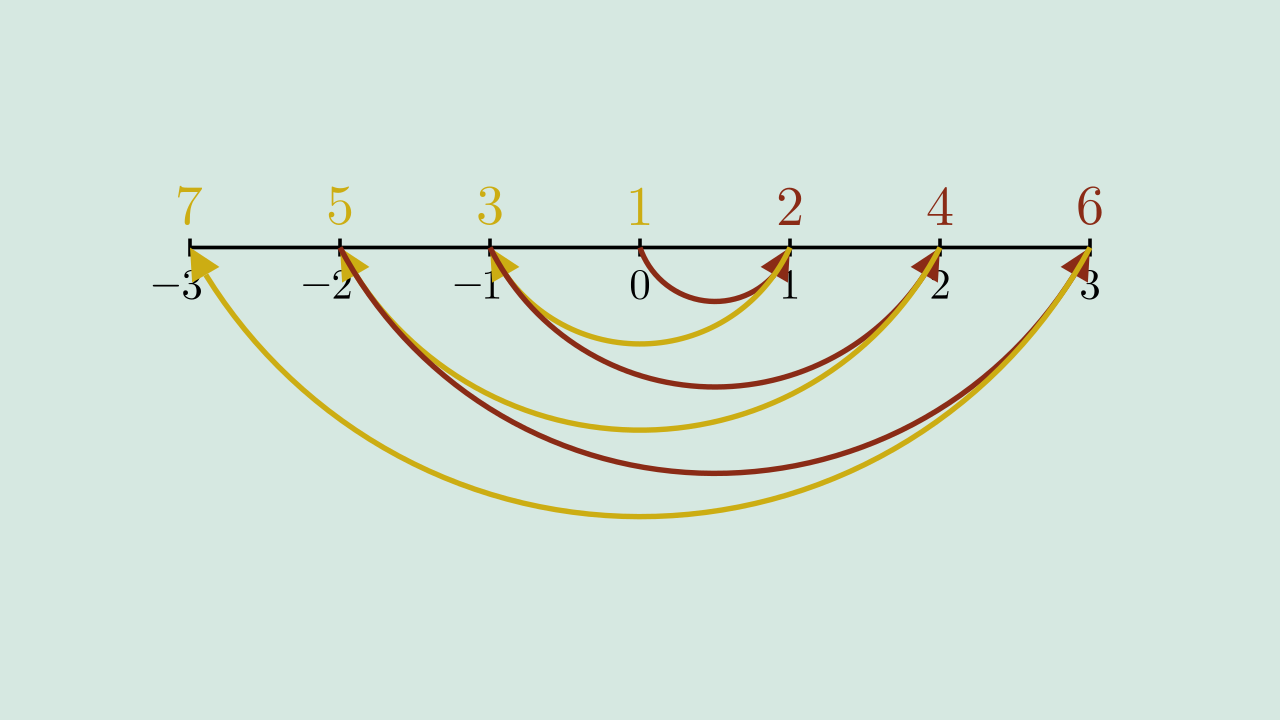

In [49]:
%%manim --quality=m --save_last_frame CountAllIntegersWithArrows

class CountAllIntegersWithArrows(Scene):
    def construct(self):
        """
        Draws a number line from -5 to 5
        The animates "counting" the number line by showing
        a new number above the number line. Starting with 0 over 0,
        1 over 1, then 2 over -1, then 3 over 2, 4 over -2 and so on.
        """
        self.camera.background_color = "#d6e8e1"
        number_line = NumberLine(x_range=[-3, 3, 1], length=10, include_numbers=True, color=BLACK, font_size=46, stroke_width=4)
        number_line.shift(UP * 1.25)
        for number in number_line.numbers:
            number.set_color(BLACK)
        self.play(FadeIn(number_line), run_time=0.2)
        # self.play(FadeIn(number_line), run_time=0.5)
        self.wait(0.5)


        positions = [0]
        for n in range(1, 4):
            positions.append(n)
            positions.append(-n)

        count = 0
        shown = set()
        last_pos = None
        for pos in positions:
            if pos in shown or pos < -3 or pos > 3:
                continue
            shown.add(pos)
            count += 1
            color = "#8a2b16" if pos > 0 else "#ccad13"
            label = Integer(count, font_size=60, color=color)
            label.next_to(number_line.n2p(pos), UP)
            # Draw a curving arrow from last_pos to pos
            if last_pos is not None:
                start = number_line.n2p(last_pos)
                end = number_line.n2p(pos)
                # Use a CurvedArrow with angle depending on direction
                angle = 120*math.pi/180 if pos > last_pos else -120*math.pi/180
                arrow = CurvedArrow(start, end, angle=angle, color=color, stroke_width=6)
                self.play(Create(arrow), run_time=0.5)
            self.play(FadeIn(label), run_time=0.5)
            self.wait(0.4)
            last_pos = pos
        self.wait(3)